First 5 rows:
                   Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130072080.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017         2018         2019  \
0 


Enter a year between 1960 and 2024:  2000


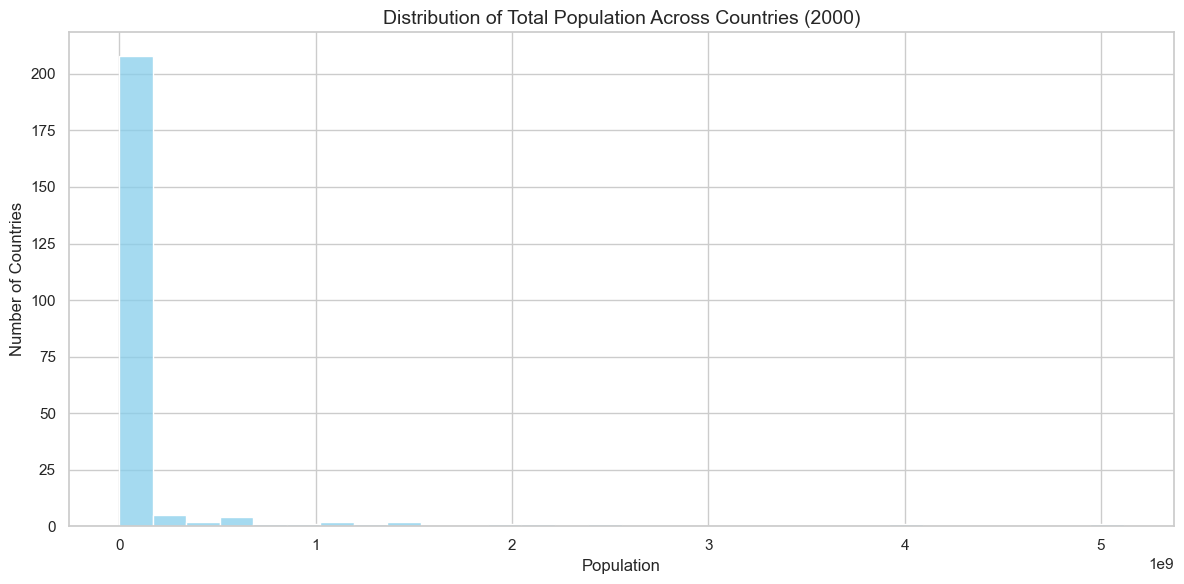

In [71]:
# 1. Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read the CSV file (skip metadata rows)
df = pd.read_csv("C:/Users/Shivprasad/Downloads/Prodigy_1/API_SP.POP.TOTL_DS2_en_csv_v2_131993.csv", skiprows=4)

# 3. EDA - Explore the dataset
print("First 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())
print("\nColumns in dataset:\n", df.columns)
print("\nSummary Statistics:\n", df.describe())
print("\nNull values:\n", df.isnull().sum())

# 4. Cleaning the dataset
# Get available years (remove non-year columns)
available_years = df.columns[4:-1]

# Ask user for a year to visualize
year = input(f"\nEnter a year between {available_years[0]} and {available_years[-1]}: ")

# Validate year input
if year not in available_years:
    print("Invalid year. Please enter a valid year.")
else:
    # Extract and clean data for selected year
    pop_data = df[['Country Name', year]].dropna()
    pop_data.columns = ['Country Name', 'Population']

    # Remove population = 0
    pop_data = pop_data[pop_data['Population'] > 0]

    # Remove non-country entries based on keywords
    excluded_keywords = ['income', 'region', 'World', 'countries', 'states', 'Euro', 'Union', 'OECD', 'Arab']
    pop_data = pop_data[~pop_data['Country Name'].str.contains('|'.join(excluded_keywords), case=False)]

    # 5. Plotting the histogram
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.histplot(pop_data['Population'], bins=30, kde=False, color='skyblue')

    # Add plot labels and title
    plt.title(f'Distribution of Total Population Across Countries ({year})', fontsize=14)
    plt.xlabel('Population', fontsize=12)
    plt.ylabel('Number of Countries', fontsize=12)
    plt.tight_layout()
    plt.show()
